# LOAD IN DATASET



In [ ]:
#https://www.kaggle.com/datasets/algord/fake-news/data

# New dataset
#https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection/data

Checkpoint 1:
- look at error rate
- remove quotations to clean data, does it have an effect on the model?
- maybe weight on accuracy to determine fake vs real news
- save predictions on the testing set for SVM  
- before running count vectorizor, remove punctuation to see if it changes the accuracy
- have a table that summarizes each model- accuracy, precision, recall
- confusion matrix for each model
- relative word count
- flowchart for how each models are combined
- ELI5 library- scikit for SVM, have it print out text and it'll highlight fake vs real text - pipeline tutorial
- null accuracy

Checkpoint 2:
- individual words being good indicators
- sequence models (transformer and RNNs)
- SVM vs Naives Bayes - try some more scikit models
- individual words are important! (frequency, not word meaning)
- word count visualizations
- Notebook 3.2 in DIDA 310 (relative word count)- for Naive Bayes and SVM
- build an ensemble model?
- Hugging Face, Chpt 2 FastAI txtbook or scikit-learn


Run your own key and password

In [ ]:
# ANNA
%env KAGGLE_USERNAME=annanguyeen
%env KAGGLE_KEY=3eeaefc1b64f8f16063ed8e81910881c

env: KAGGLE_USERNAME=annanguyeen
env: KAGGLE_KEY=3eeaefc1b64f8f16063ed8e81910881c


In [3]:
# AIDAN
%env KAGGLE_USERNAME=aidan123456
%env KAGGLE_KEY=c14b60ef82427afa1cdf686430f9dccc

env: KAGGLE_USERNAME=aidan123456
env: KAGGLE_KEY=c14b60ef82427afa1cdf686430f9dccc


In [ ]:
#Aiesha
%env KAGGLE_USERNAME= aieshaayub
%env KAGGLE_KEY= 9e44141b18d723294901dc1ce3792b80

env: KAGGLE_USERNAME=aieshaayub
env: KAGGLE_KEY=9e44141b18d723294901dc1ce3792b80


In [ ]:
#Jialene
%env KAGGLE_USERNAME=jialenewestcott
%env KAGGLE_KEY=74e80c63ef591fc491da937f7a7d62fd

env: KAGGLE_USERNAME=jialenewestcott
env: KAGGLE_KEY=74e80c63ef591fc491da937f7a7d62fd


Download the dataset from Kaggle

In [4]:
#New dataset
!kaggle datasets download -d bhavikjikadara/fake-news-detection
!unzip fake-news-detection.zip

fake-news-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fake-news-detection.zip
replace fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
# !kaggle datasets download -d algord/fake-news
# !unzip fake-news.zip

# DATA CLEANING

Load in the libraries

In [2]:
from fastai.vision.all import *
import pandas as pd
from fastai.tabular.all import *
from fastai.collab import *
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from tkinter import *

Read in the datasets as dataframes, add a "Label" column assigning 0 as Fake news, 1 as Real news

In [5]:
real = pd.read_csv("true.csv")
real['label'] = 1
real['text'] = real['text'].str.replace(r'^.*\(Reuters\)\s*-\s*', '', regex=True)
real

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip their fiscal script","The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits on Monday: Pentagon,"Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “T...",politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without polit...",politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked ...",politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,"President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past. “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trump wrote on Twitter. The president’s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens o...",politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach on Afghanistan,"NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military

In [6]:
fake = pd.read_csv("fake.csv")
fake['label'] = 0 # 0 as fake, 1 as real
fake.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of m...",News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoul...",News,"December 31, 2017",0


In [ ]:
# fakenews = pd.read_csv("/content/FakeNewsNet.csv")
# fakenews.head(5)

In [7]:
# Joined dataset, optional use
from random import sample
news = pd.concat([fake,real])
news['text'] = news['title'] + " " + news['text']
news = news.sample(frac=1).reset_index(drop=True) #shuffle rows
news.head(5)

,title,text,subject,date,label
0,Here’s The Ted Cruz Ad Starring An Adult Film Star He Doesn’t Want You To See (VIDEO),"Here’s The Ted Cruz Ad Starring An Adult Film Star He Doesn’t Want You To See (VIDEO) Ted Cruz s presidential campaign has pulled an ad featuring a softcore adult film star. The ad, titled Conservatives Anonymous, was an attack ad focused on Senator Marco Rubio. In the production, a support group for conservatives talks about being betrayed by Rubio and his flip-flop on immigration.One of the conservatives in the group is played by actress Amy Lindsay, who tells the group, maybe you should vote for more than just a pretty face next time. When they were asked about Lindsay, the Cruz cam...",News,"February 11, 2016",0
1,North Korea dismisses report that sixth nuclear test killed many people,"North Korea dismisses report that sixth nuclear test killed many people North Korea s state media on Thursday dismissed as misinformation a recent media report that the North s sixth nuclear test killed many people. Japanese broadcaster TV Asahi reported on Tuesday, citing unnamed sources familiar with the issue, that North Korea s nuclear test site collapsed after Pyongyang s sixth atomic test in September, possibly killing more than 200 people. The North s official KCNA said it was a false report intended to slander the country and its advances in nuclear development.",worldnews,"November 2, 2017",1
2,HOLY MUSLIM INDOCTRINATION! Sesame Street Introduces Hijab Wearing Muppet,"HOLY MUSLIM INDOCTRINATION! Sesame Street Introduces Hijab Wearing Muppet Where s The Muppet Dressed As A Nun?Oh wait that would probably be offensive to non-Christians Sesame Street unveiled a fresh face Thursday: a hijab-wearing Afghani Muppet named Zari who will teach kids about girl empowerment, social and emotional wellbeing. Zari will first appear in season five of Baghch-e-Simsim, which is the Afghan version of Sesame Street.The popular children show s Twitter account was abuzz with Zari content Thursday.Introducing Zari! Our new friend in Afghanistan, joining #BaghcheSimSim for #S...",left-news,"Apr 8, 2016",0
3,Fights erupt at pro-Trump rally on California beach,"Fights erupt at pro-Trump rally on California beach Supporters of President Donald Trump holding a rally on a popular southern California beach clashed with counter-protesters on Saturday and four people were arrested, law enforcement said. Multiple fights broke out and at least one Trump supporter was doused with pepper spray when pro-Trump demonstrators marching along Bolsa Chica State Beach encountered a small group opposed to the Republican president who had gathered to denounce the rally. Four counter-protesters were arrested, three for illegal use of pepper spray and one for assaul...",politicsNews,"March 26, 2017",1
4,Senator Kirk criticizes fellow Republicans on Garland boycott,"Senator Kirk criticizes fellow Republicans on Garland boycott Senator Mark Kirk of Illinois on Tuesday accused many of his fellow Senate Republicans of being “closed-minded” by refusing to consider President Barack Obama’s nomination of Merrick Garland to serve on the U.S. Supreme Court. Kirk, facing a tough re-election battle in his Democratic-leaning state, became the first Republican senator to meet with Garland since Obama nominated the centrist appellate judge and former prosecutor on March 16 to replace conservative Justice Antonin Scalia, who died on Feb. 13. There is a need for “op...",politicsNews,"March 29, 2016",1


In [8]:
news['label'] = news['label'].astype("float")

In [ ]:
import pandas as pd
import re

def remove_punctuation(text):
    pattern = r'[\'"‘’“”]'
    clean_text = re.sub(pattern, '', text)
    return clean_text

In [ ]:
news['text'] = news['text'].apply(remove_punctuation)

## Split data into train, validation, and test
Combining all the splitting steps in all models, making sure all models use the same testing, validation, and training sets

Proportion: 80% train, 10% test, 10% validation


In [ ]:
# split 80% train, 10% test, 10% validation
rows = len(news)
train_rows = int(rows * 0.8)
test_rows = int(rows * 0.1)
val_rows = rows - train_rows - test_rows

train_df = news[:train_rows]
test_df = news[train_rows:train_rows + test_rows]
val_df = news[train_rows + test_rows:]

print("Training:", len(train_df))
print("Test:", len(test_df))
print("Validation:", len(val_df))



Training: 35918
Test: 4489
Validation: 4491


In [ ]:
X = news["text"]
y = news["label"]

X_train, y_train = train_df['text'], train_df['label']
X_test, y_test = test_df['text'], test_df['label']
X_val, y_val = val_df['text'], val_df['label']

#split into different csv files
#shuffle

# TESTING MODELS


## (1) MLP and Transformers

### Transformers - Anna

In [ ]:
#####################################################################################################################
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
#####################################################################################################################


In [ ]:
# restarting runtime after this code
!pip install --upgrade pyarrow parquet
!pip install -q datasets
!pip install transformers[torch]
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.0/689.0 kB 48.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 8.2 MB/s eta 0:00:00
  Created wheel for thriftpy2: filename=thriftpy2-0.4.20-cp310-cp310-linux_x86_64.whl size=1388643 sha256=e1496c4c742169f34677184d2065dc36ba369e103757180f3341cc93bc1e8aa7
  Stored in directory: /root/.cache/pip/wheels/9b/1c/2f/97ec7c0e2a61885927d99666f593f1c3bed8a679cb56be635c
Successfully built thriftpy2
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2


In [ ]:
#! pip install -U accelerate
#! pip install -U transformers
#!pip uninstall transformers
!pip install --upgrade transformers==4.39.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [ ]:
from datasets import Dataset,DatasetDict
from transformers import TrainingArguments,Trainer, AdamW, AutoModelForSequenceClassification,AutoTokenizer, pipeline
from sklearn import metrics
import bitsandbytes as bnb

In [ ]:
from transformers.data.processors.squad import SquadResult, SquadV1Processor, SquadV2Processor, squad_convert_examples_to_features, squad_convert_example_to_features_init
from transformers import AutoTokenizer, AutoConfig, squad_convert_examples_to_features


In [ ]:
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
train_tfm = Dataset.from_pandas(train_df[["text","label"]])
test_tfm = Dataset.from_pandas(test_df[["text","label"]])

In [ ]:
def tok_func(x):
  return tokenizer(x["text"], padding=True, truncation=True, max_length=50, return_tensors="tf",
                   add_special_tokens = True)

train_tfm = train_tfm.map(tok_func, batched=True)
test_tfm = test_tfm.map(tok_func, batched=True)
test_tfm

Map:   0%|          | 0/35918 [00:00<?, ? examples/s]

Map:   0%|          | 0/4489 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4489
})

In [ ]:
import accelerate

accelerate.__version__

'0.28.0'

In [ ]:
bs = 8
epochs = 4
lr = 1e-5

args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=False, #fp16=True
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none', optim="adamw_bnb_8bit")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def accuracy(x, y):
    return ((x > 0.5).reshape(-1) == y).mean()

def acc_metric(eval_pred):
    return {"accuracy": accuracy(*eval_pred)}

trainer = Trainer(model, args, train_dataset=train_tfm, eval_dataset=test_tfm,
                  tokenizer=tokenizer, compute_metrics=acc_metric)


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.010600,0.006415,0.992649
2,0.006000,0.007057,0.991535
3,0.002500,0.003100,0.996436
4,0.002700,0.002442,0.997104


TrainOutput(global_step=17960, training_loss=0.011283975583241884, metrics={'train_runtime': 2085.7091, 'train_samples_per_second': 68.884, 'train_steps_per_second': 8.611, 'total_flos': 3691538294877600.0, 'train_loss': 0.011283975583241884, 'epoch': 4.0})

In [ ]:
eval_results = trainer.evaluate(test_tfm)
print(f"Accuracy: {eval_results['eval_accuracy']}")
print(f"Error Rate: {1 - eval_results['eval_accuracy']}")

Accuracy: 0.9971040320784139
Error Rate: 0.0028959679215860845


In [ ]:
y_pred_train = trainer.predict(train_tfm).predictions
y_pred_test  = trainer.predict(test_tfm).predictions

In [ ]:
y_pred_train = (y_pred_train.reshape(-1) > 0.5).astype("float")
y_pred_test  = (y_pred_test.reshape(-1) > 0.5).astype("float")

In [ ]:
print(metrics.classification_report(train_tfm["label"], y_pred_train, zero_division=0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18725
         1.0       1.00      1.00      1.00     17193

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918



In [ ]:
print(metrics.classification_report(test_tfm["label"], y_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2386
         1.0       1.00      1.00      1.00      2103

    accuracy                           1.00      4489
   macro avg       1.00      1.00      1.00      4489
weighted avg       1.00      1.00      1.00      4489



### MLP - Aidan

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    news['text'],
    news['label'],
    test_size=0.2,
    random_state=123456
)

In [13]:
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.7,
    min_df=10,
    ngram_range=(1, 2)
)

In [14]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='relu',
                    solver='adam',
                    max_iter=200,
                    shuffle=True,
                    random_state=123456,
                    early_stopping=True,
                    tol=0.0004,
                    n_iter_no_change = 3,
                    verbose=True)

In [17]:
mlp.fit(X_train_tfidf, y_train)
y_pred = mlp.predict(X_test_tfidf)

Iteration 1, loss = 0.24577385
Validation score: 0.983853
Iteration 2, loss = 0.03750201
Validation score: 0.991091
Iteration 3, loss = 0.01408595
Validation score: 0.992205
Iteration 4, loss = 0.00800991
Validation score: 0.992483
Iteration 5, loss = 0.00590947
Validation score: 0.993597
Iteration 6, loss = 0.00489864
Validation score: 0.993318
Iteration 7, loss = 0.00430578
Validation score: 0.993318
Iteration 8, loss = 0.00391134
Validation score: 0.993318
Iteration 9, loss = 0.00358915
Validation score: 0.993597
Validation score did not improve more than tol=0.000400 for 3 consecutive epochs. Stopping.


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 99.15%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4685
         1.0       0.99      0.99      0.99      4295

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
 [[4647   38]
 [  38 4257]]


In [19]:
weights = mlp.coefs_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()
average_weights = np.mean(np.abs(weights), axis=1)
feature_weights = zip(feature_names, average_weights)
sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

In [20]:
for feature, weight in sorted_features[:10]:
    print(f"Feature: {feature}, Average Weight: {weight}")

Feature: breaking, Average Weight: 0.24004754727194705
Feature: president donald, Average Weight: 0.2316910056779909
Feature: video, Average Weight: 0.22465011613429187
Feature: read, Average Weight: 0.22038977418366887
Feature: president trump, Average Weight: 0.20859784625639174
Feature: reportedly, Average Weight: 0.2075076050639666
Feature: said thursday, Average Weight: 0.20145534959662967
Feature: said statement, Average Weight: 0.19862179726823395
Feature: factbox, Average Weight: 0.19669832933071277
Feature: wednesday, Average Weight: 0.19636002604811076


In [ ]:
user_mlp_input = input("Please input an article")

Please input an article


In [ ]:
input_tfidf = tfidf_vectorizer.transform([user_mlp_input])
mlp_prediction = mlp.predict(input_tfidf)
print(mlp_prediction)

## (2) SVM and Naive Bayes

### SVM- Aiesha Ayub

In [ ]:
cv = CountVectorizer(max_features=10000, stop_words='english')
X_train = cv.fit_transform(X_train)

tfidf = TfidfTransformer(use_idf=True)
X_train = tfidf.fit_transform(X_train)

In [ ]:
X_test = cv.transform(X_test)
X_test = tfidf.transform(X_test)

In [ ]:
# Create a classifier model
SVM_classifier = SGDClassifier()

# Then train the model using the training sets
SVM_classifier = SVM_classifier.fit(X_train, y_train)

In [ ]:
# First, what's the worst the model could do?
y.value_counts(normalize=True)

0.0    0.522985
1.0    0.477015
Name: label, dtype: float64

In [ ]:
# How well did the model do on the training data?
# Compare the predictions with the
y_pred_train = SVM_classifier.predict(X_train)
metrics.accuracy_score(y_train, y_pred_train)

0.9954897265994765

In [ ]:
# Now, determine how well it did on the testing set
# It will be lower, but hopefully not too much.
# If it's anywhere near random guessing, we've got a bad fit.
y_pred_test = SVM_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)

0.9933169971040321

In [ ]:
# Print out a report of how wel the classifier does
# precision of X = If I predict something is X, what % of the time am I right?
# recall of X = what % of X do I find?
print(metrics.classification_report(y_test, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2387
         1.0       0.99      1.00      0.99      2102

    accuracy                           0.99      4489
   macro avg       0.99      0.99      0.99      4489
weighted avg       0.99      0.99      0.99      4489



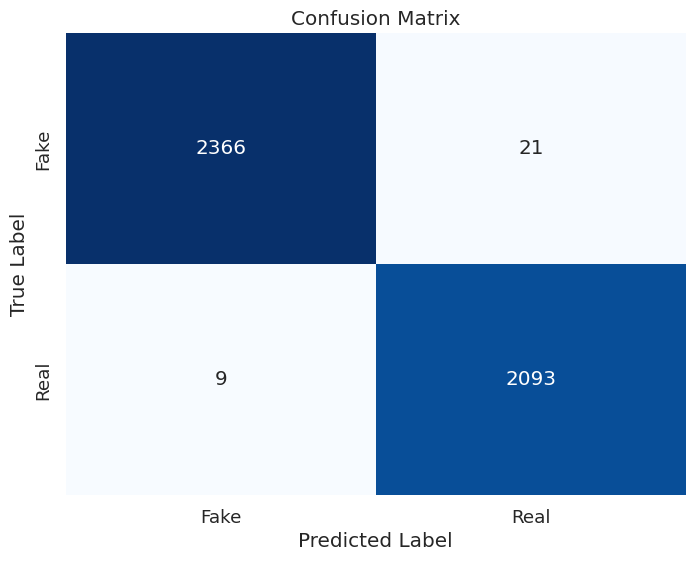

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes- Jialene

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    44898 non-null  object 
 1   text     44898 non-null  object 
 2   subject  44898 non-null  object 
 3   date     44898 non-null  object 
 4   label    44898 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
NB_classifier = MultinomialNB()
NB_classifier = NB_classifier.fit(X_train, y_train)

In [ ]:
y.value_counts(normalize=True)

0.0    0.522985
1.0    0.477015
Name: label, dtype: float64

In [ ]:
y_pred_train = NB_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

y_pred_test = NB_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_test))

0.944234088757726
0.9440855424370684


In [ ]:
print(metrics.classification_report(y_test, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      2331
         1.0       0.94      0.95      0.94      2158

    accuracy                           0.94      4489
   macro avg       0.94      0.94      0.94      4489
weighted avg       0.94      0.94      0.94      4489



# SAVING MODELS
Already ran this to save to drive. DON'T run again!
TRANSFORMER

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
# from sklearn.ensemble import VotingClassifier
# #create a dictionary of our models
# estimators=[('rnn', rnn), ('transformer', transformer), ('svm', SVM_classifier), ('nb', NB_classifier)]
# #create our voting classifier, inputting our models
# ensemble = VotingClassifier(estimators, voting='hard')


In [ ]:
gdrive_path = "/content/gdrive/MyDrive/425 models/"

In [ ]:
trainer.save_model("./transformer")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
shutil.copytree("./transformer", "/content/gdrive/MyDrive/425 models/transformers")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/MyDrive/425 models/transformers'

###MLP

In [ ]:
import pickle


SVM

In [ ]:
with open('/content/gdrive/MyDrive/425 models/svm_model.pkl', 'wb') as f:
    pickle.dump(SVM_classifier, f)

In [ ]:
with open('/content/gdrive/MyDrive/425 models/tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('/content/gdrive/MyDrive/425 models/vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

NAIVE BAYES

In [ ]:
with open('/content/gdrive/MyDrive/425 models/naivebayes.pkl', 'wb') as f:
    pickle.dump(NB_classifier, f)

MLP

In [ ]:
with open('/content/gdrive/MyDrive/425 models/mlp.pkl', 'wb') as f:
    pickle.dump(mlp, f)

# ENSEMBLE MODEL
save the accuracy of all models into csv files/dataframe
-> pull out the average accuracy/**label**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import re
import pickle
input_text = """WASHINGTON — The economy is improving, inflation is falling, joblessness is down, and the stock market is hitting record highs. Crime is dropping. U.S. crude oil production is at an all-time high. A special counsel declined to bring charges against President Joe Biden for mishandling classified information, and the Republican impeachment inquiry is flailing.

Biden's case for re-election is strengthening, but he still enters the general election in a weaker position than he did in 2020, when he consistently led Donald Trump in national and swing state surveys, often by wide margins. His struggles come despite Trump’s mounting legal bills and four criminal cases, with one trial set to begin next month.

Democrats offer a variety of theories as to why.

“Because we haven’t made our argument yet,” Sen. Brian Schatz, D-Hawaii, said in an interview.

“Democrats’ record on the economy, on crime, on making prescription drugs less expensive, on climate action, on civil rights, on human rights, on gun safety — our record is strong, and [Trump’s] record was catastrophically bad," he said. "But we haven’t spent any money and any time making that argument because we’ve been too busy doing the work. As we move into a different season, we’re going to be making that argument. Once people hear it, the votes move.”"""
input_text = re.sub(r'[\'"‘’“”]', '', input_text)
input_text = re.sub('^.*\(Reuters\)\s*-\s*', '', input_text)

In [ ]:
input_text = [input_text]
cv_text = cv.transform(input_text)
tfidf_text = tfidf.transform(cv_text)

In [ ]:
import shutil

# Copy the saved model folder or zip file from Google Drive to Colab
# If it's a folder:
shutil.copytree("/content/gdrive/MyDrive/425 models/transformers", "transfomer")

'transfomer'

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the saved model
model = AutoModelForSequenceClassification.from_pretrained("/content/transfomer")

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("/content/transfomer")

In [ ]:
import torch

inputs = tokenizer(input_text, return_tensors="pt")

# Forward pass through the model to obtain logits
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted class label
predicted_label = torch.sigmoid(outputs.logits).squeeze().tolist()  # Assuming binary classification
if predicted_label >= 0.5:
    predicted_class = "Real news"
else:
    predicted_class = "Fake news"

predicted_score = torch.sigmoid(outputs.logits).item()  # Assuming binary classification

# Print the predicted class and probability score
print("Transformers predicted label:", predicted_class)
print("Transformers predicted score:", predicted_score)

Transformers predicted label: Real news
Transformers predicted score: 0.5439008474349976


In [ ]:
# Initialize a list to store the predicted class labels for each text
predicted_labels = []

# Prediction
for index, row in val_df.iterrows():
    text = row['text']
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)
    predicted_label = torch.sigmoid(outputs.logits).squeeze().tolist()

    if predicted_label >= 0.5:
        predicted_class = 1  # Real news
    else:
        predicted_class = 0  # Fake news

    predicted_labels.append(predicted_class)

val_df['predicted_label'] = predicted_labels
print(val_df)

In [ ]:
def define_labels(prob):
  if prob >= 0.5:
    predicted_class = "Real"  # Real news
  else:
    predicted_class = "Fake"  # Fake news
  return predicted_class

### SVM

In [ ]:
#Load models in
with open('/content/gdrive/MyDrive/425 models/svm_model.pkl', 'rb') as f:
    svm_classifier = pickle.load(f)

with open('/content/gdrive/MyDrive/425 models/vectorizer.pkl', 'rb') as f:
    cv = pickle.load(f)

with open('/content/gdrive/MyDrive/425 models/tfidf.pkl', 'rb') as f:
    tfidf = pickle.load(f)

In [ ]:
svm_prob = svm_classifier.decision_function(tfidf_text)
svm_pred_label = define_labels(svm_prob)
print("SVM predicted label: ", svm_pred_label)
print("SVM predicted score: ", svm_prob[0])

SVM predicted label:  Real
SVM predicted score:  0.5053364307160422


### Naive Bayes

In [ ]:
with open('/content/gdrive/MyDrive/425 models/naivebayes.pkl', 'rb') as f:
    nb_classifier = pickle.load(f)

In [ ]:
nb_prob = nb_classifier.predict_proba(tfidf_text)
nb_pred_label = define_labels(nb_prob[0][1])
print("Naive Bayes predicted label: ", nb_pred_label)
print("Naive Bayes predicted score: ", nb_prob[0][1])

Naive Bayes predicted label:  Real
Naive Bayes predicted score:  0.558790696448108


# VISUALIZATIONS

In [ ]:
from wordcloud import STOPWORDS
import seaborn as sns
!pip install tidytext
import tidytext
# This library is used by tidytext for tokenization
import nltk
nltk.download('punkt')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 2.7 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3871 sha256=fed8e06d42c42adb1ba2d1046dd6c80280cf5d82202c20b281aa821ec76a40ce
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
fake = pd.read_csv("/content/fake.csv")
fake['label'] = "fake" # 0 as fake, 1 as real
fake.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of m...",News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoul...",News,"December 31, 2017",fake


In [ ]:
real = pd.read_csv("/content/true.csv")
real['label'] = "real"
real.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a figh...",politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not chal...",politicsNews,"December 29, 2017",real


In [ ]:
from random import sample
news = pd.concat([fake,real])
news = news.sample(frac=1).reset_index(drop=True) #shuffle rows
news.head(5)

,title,text,subject,date,label
0,Obama adviser Deese to lead White House's Supreme Court process,"WASHINGTON (Reuters) - President Barack Obama has turned to senior adviser Brian Deese, an economic expert who previously led the administration’s climate change efforts, to head a team formed to pick a Supreme Court nominee and win confirmation, the White House said. White House counsel Neil Eggleston will be a part of that team and will steer the legal process, including the vetting of potential candidates, administration officials said on Monday. Leading Republicans have vowed to block any nominee Obama chooses, leaving the White House with the challenge of finding someone it believes c...",politicsNews,"February 29, 2016",real
1,"Trump says abortion doctors, not women should face punishment","WASHINGTON (Reuters) - Donald Trump on Wednesday rowed back statements that women who sought abortions under a proposed ban should be punished. “If Congress were to pass legislation making abortion illegal and the federal courts upheld this legislation, or any state were permitted to ban abortion under state and federal law, the doctor or any other person performing this illegal act upon a woman would be held legally responsible, not the woman,” Trump said in a statement. It contradicted an earlier statement during an MSNBC town hall appearance when he said in response to questions from t...",politicsNews,"March 30, 2016",real
2,#VeryFakeNews CNN BRAGS ABOUT RATINGS To President Trump On Twitter After CNN Producer Is Caught On Video Admitting Trump-Russia Stories Are Fake News…Only About The RATINGS!,"James O Keefe s Project Veritas reporters went undercover at CNN to investigate the #VeryFakeNews network to determine the motivation behind CNN s Trump-Russia collusion obsession. Since the inauguration, CNN has mentioned Russian story nearly 16,000 times.Project Veritas reporters can be seen in the video below having a conversation with CNN s supervising producer John Bonifield. The reporter talked to Bonifield first about the constant barrage of Trump-Russia stories on CNN. Bonifield admitted that although CNN has no evidence or proof of Trump involvement with Russia, they continue t...",left-news,"Jun 27, 2017",fake
3,Trump Attacks James Comey For Not Jailing Clinton: ‘She Was Guilty Of Every Charge’ (VIDEO),"In an interview with Fox Business that aired Tuesday, Donald Trump responded to news that the FBI had successfully obtained a FISA warrant to look into his former advisor Carter Page by trashing James Comey for not locking Hillary Clinton up. Sure, Clinton did not commit any crimes and was never charged with anything, but according to Trump she is GUILTY GUILTY GUILTY. When Jim Comey came out, he saved Hillary Clinton. He saved her life, Trump said, apparently forgetting that a certain letter from Comey helped swing the election his way. When he was reading those charges, she was guilty of...",News,"April 12, 2017",fake
4,"Trump Just Sent A MAJOR F*ck You To The Supreme Court, CONFIRMS His Own Incompetency (DETAILS)","Donald Trump and his administration have proven time and time again that they are incapable of performing even the most simple, basic tasks that only require basic human decency and manners. The latest gaffe in the White House demonstrates that even as Trump s 100th day approaches, they still can t get their sh*t together.According to a White House aide and court spokeswoman, Trump did not extend a formal invitation to the Supreme Court to have dinner at the White House on Thursday. An initial report that was released early Sunday stated that a dinner WOULD take place: That evening, the Pr...",News,"April 25, 2017",fake


In [ ]:
import pandas as pd
import re

def remove_punctuation(text):
    pattern = r'[\'"‘’“”]'
    clean_text = re.sub(pattern, '', text)
    return clean_text

In [ ]:
news['text'] = news['text'].apply(remove_punctuation)

In [ ]:
df = tidytext.unnest_tokens(news, "word", "text")

In [ ]:
df = df[["label", "word"]]
df.head()

,label,word
0,real,washington
0,real,reuters
0,real,president
0,real,barack
0,real,obama


In [ ]:
#First, we remove stop words:
clean_words = df.loc[ ~df["word"].isin(STOPWORDS) ]

In [ ]:
#Then count them, just as we did before (after some grouping)
counts = clean_words.groupby("label")["word"].value_counts(normalize=True)

In [ ]:
# keep anything with a count > 0.0005
counts = counts[counts > 0.0005]

In [ ]:
#...and then convert it back to a dataframe.
counts.name = "text_freq"
counts = counts.reset_index()

In [ ]:
counts = counts.sample(frac=1).reset_index(drop=True)
counts.head()

,label,word,text_freq
0,real,democrat,0.000547
1,real,reuters,0.005732
2,fake,obama,0.003113
3,fake,home,0.000576
4,fake,doesn,0.000911


In [ ]:
counts = counts.pivot(index='word', columns='label', values='text_freq')
counts = counts.reset_index()

In [ ]:
counts.loc[counts["fake"].isna(), "fake"] = 0.0005/2
counts.loc[counts["real"].isna(), "real"]  = 0.0005/2

In [ ]:
# column ratio should be the TF for MOVIE divided by TF for SHOW
counts["ratio"] = counts["fake"]/counts["real"]
counts["logratio"] = np.log10(counts["ratio"])

In [ ]:
counts = counts.sort_values("logratio", ascending=True)
counts

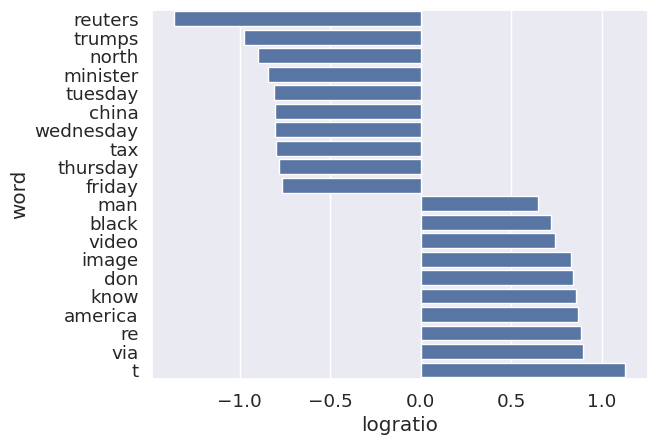

In [ ]:
firstlast = pd.concat([  counts[0:10] , counts[-10:]  ]) #remove quotations

# What kind of plot should I use?
sns.barplot(data=firstlast, x="logratio", y="word")
plt.show()